In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv('ford.csv')

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
df.shape

(17966, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [8]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### EDA

In [10]:
num_cols = ["year","mileage","tax","mpg","engineSize","price"]

###  1) Target vs each numeric (regression line)

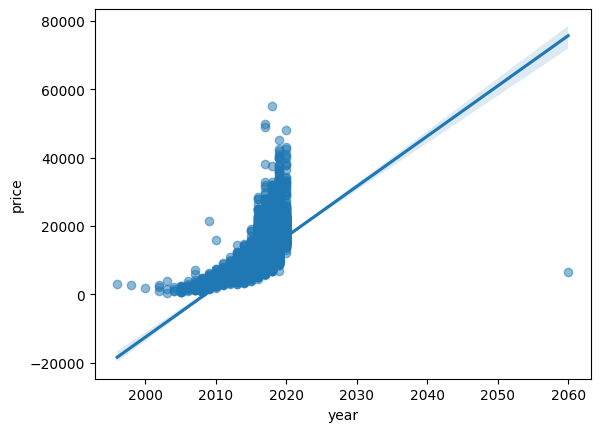

In [11]:
sns.regplot(data=df, x="year", y="price", scatter_kws={'alpha':0.5})
plt.show()

### Axes:

 X-axis (horizontal) → year (car banne ka year)

Y-axis (vertical) → price (car ki market price)
### Scatter Plot:
Har blue dot ek car ko represent kar raha hai (uska manufacturing year vs uski price).
Beech ki blue line ek regression line hai (line of best fit) jo general trend ko dikhati hai.
Observation:
1. Positive correlation: Jaise-jaise car ka year naya hota hai (recent year), price zyada hoti hai. Matlab 2000 ki car sasti hai aur 2020 ki car mehengi.

2. Purani cars (2000 ke aas paas) ki prices bahut low hain (kuch almost 0 ke barabar).
3. 2010–2020 ke baad prices sharply increase hoti hain → Matlab nayi models ki demand aur technology ke wajah se zyada price
4. Regression line future years (2040–2060) tak extend ho rahi hai, jisme unrealistic prediction aa raha hai (price 60k–80k). Matlab model over-extrapolate kar raha hai, aur aage ke liye sahi prediction nahi de raha.
5. Outliers: Kuch points 2020 ke baad bhi scatter ke bahar dikh rahe hain (jaise ek 2050–2060 wali point). Ye data galat ya dummy ho sakta hai.
### Conclusion:
Trend: Nayi gaadiyan purani gaadiyon se mehengi hoti hain → positive relationship hai.
Limitation: Regression line galat direction mein extrapolate kar rahi hai future ke liye (kyunki hamara data mainly 2000–2020 ke beech tha).
### Matlab:
 Year car price ka ek strong factor hai, lekin prediction ko realistic range tak hi use karna chahiye.


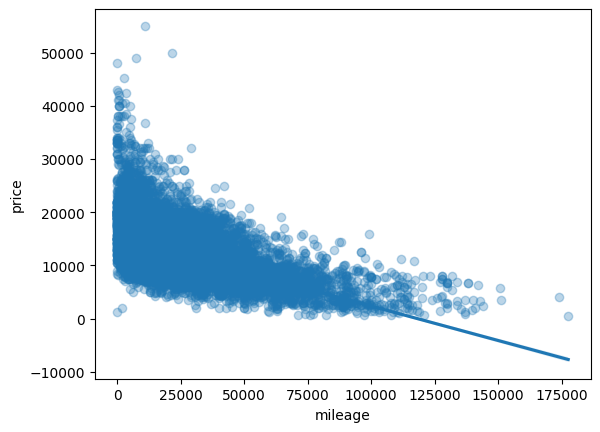

In [12]:
sns.regplot(data=df, x="mileage", y="price", scatter_kws={'alpha':0.3})
plt.show()

### Axes:
X-axis (horizontal) → mileage (car ne kitne km chali hai).
Y-axis (vertical) → price (car ki market price).
### Scatter plot:
Har blue dot ek car represent karta hai (uska mileage vs price).
Beech ki line ek regression line hai jo data ka average trend dikhati hai.
### Observations:
1. Negative relationship: Jaise-jaise car ka mileage (km driven) badhta hai, price girti hai. Matlab purani/chali hui car ki value kam hoti hai.
2. High prices low mileage pe: 0–20,000 mileage wali cars ki price zyada hoti hai (20,000–50,000 tak bhi ja rahi hai).
3. Mileage 100,000+ hone pe → price generally low ho jati hai (zyadatar 0–10,000 range mein).
4. Outliers hain:
Kuch cars high mileage (100k+) hone ke bawajood mehengi hain → shayad luxury brands.
Kuch low mileage cars ki price bhi unusually low hai → shayad damaged ya old model cars.
5. Regression line neeche ja rahi hai → clearly batata hai ke mileage aur price ke beech inverse relation hai.
### Conclusion:
Mileage ek strong factor hai jo car ki price ko reduce karta hai.
Jitna zyada car chali hogi, utni sasti hogi, lekin brand, model, aur year bhi matter karte hain (isliye scatter wide hai).
### Simple shabdon mein:
 “Nayi gaadi (kam mileage wali) mehengi, purani (zyada mileage wali) sasti.”


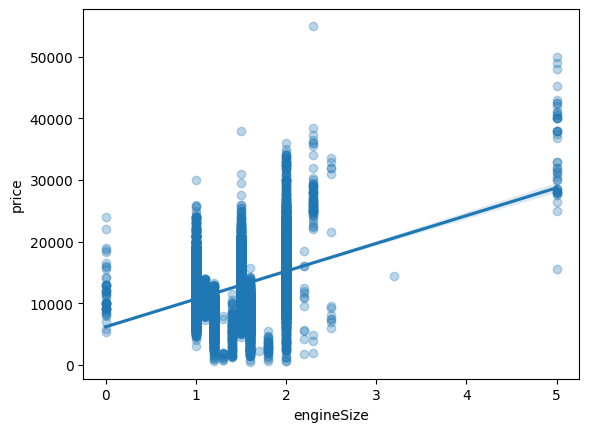

In [13]:
sns.regplot(data=df, x="engineSize", y="price", scatter_kws={'alpha':0.3})
plt.show()

### Axes:
X-axis (horizontal) → engineSize (car ka engine size, liters ya CC mein hoga)
Y-axis (vertical) → price (car ki price, currency unit mein)
### Plot:
Har blue dot ek car ko represent kar raha hai (uska engine size vs uski price).
Beech ki blue line ek regression line hai (line of best fit) jo data ka general trend dikhati hai.
### Observation:
1. Positive relationship hai → Jitna engine size bada hota hai, utni average price bhi zyada hoti hai. (Line upar ki taraf ja rahi hai).
2. Scatter mein spread hai → Har engine size pe price bahut vary karti hai. Matlab ek hi engine size wali gaadi ki price 5000 bhi ho sakti hai aur 30000 bhi.
3. Outliers bhi hain → Kuch cars ke prices bahut high hain (40000–50000 range), jo normal trend se upar jaa rahe hain.
4. Engine size 1–3 ke beech sabse zyada data points hain → Matlab zyadatar gaadiyan isi range mein aati hain.
### Conclusion:
General trend yeh hai ki engine size increase hone par car ki price bhi increase hoti hai, lekin price sirf engine size pe depend nahi karti — brand, model, year, features bhi effect karte hain (isliye scatter wide hai).
### Matlab: 
Engine size ek factor hai jo price ko influence karta hai, lekin price ke liye aur bhi factors important hain.


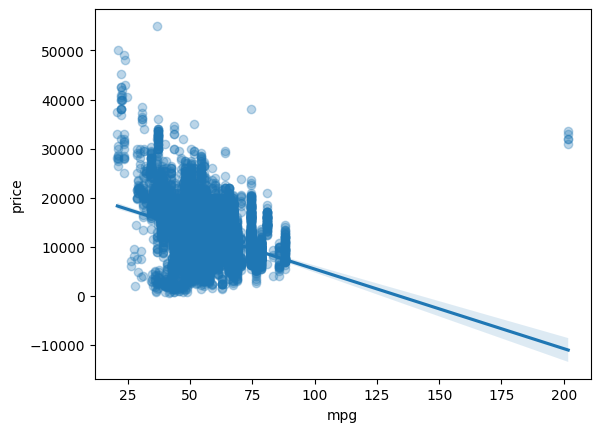

In [14]:
sns.regplot(data=df, x="mpg", y="price", scatter_kws={'alpha':0.3})
plt.show()

### Axes:
X-axis (horizontal) → engineSize (car ka engine size, liters ya CC mein hoga)
Y-axis (vertical) → price (car ki price, currency unit mein)
### Plot:
Har blue dot ek car ko represent kar raha hai (uska engine size vs uski price).
Beech ki blue line ek regression line hai (line of best fit) jo data ka general trend dikhati hai.
### Observation:
1. Positive relationship hai → Jitna engine size bada hota hai, utni average price bhi zyada hoti hai. (Line upar ki taraf ja rahi hai).
2. Scatter mein spread hai → Har engine size pe price bahut vary karti hai. Matlab ek hi engine size wali gaadi ki price 5000 bhi ho sakti hai aur 30000 bhi.
3. Outliers bhi hain → Kuch cars ke prices bahut high hain (40000–50000 range), jo normal trend se upar jaa rahe hain.
4. Engine size 1–3 ke beech sabse zyada data points hain → Matlab zyadatar gaadiyan isi range mein aati hain.
### Conclusion:
General trend yeh hai ki engine size increase hone par car ki price bhi increase hoti hai, lekin price sirf engine size pe depend nahi karti — brand, model, year, features bhi effect karte hain (isliye scatter wide hai).
### Matlab: 
Engine size ek factor hai jo price ko influence karta hai, lekin price ke liye aur bhi factors important hain.


### 2) Categorical vs price distributions

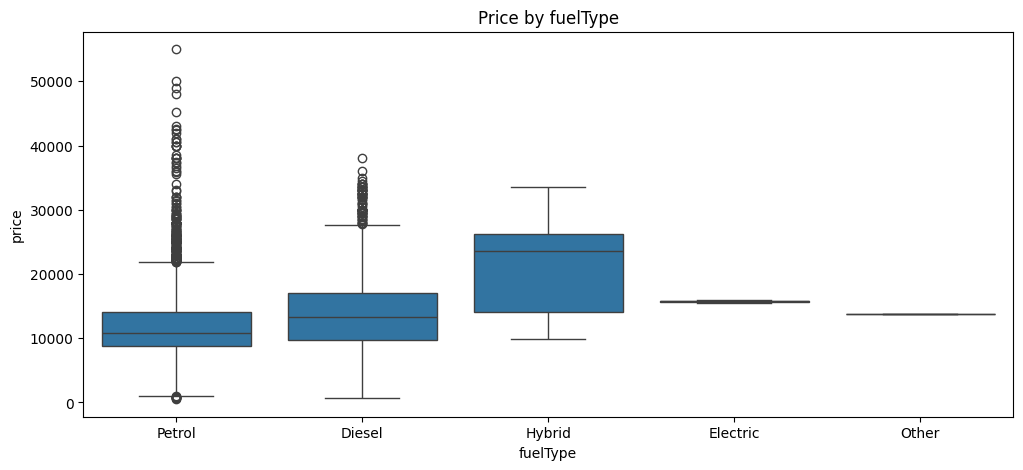

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="fuelType", y="price")
plt.title("Price by fuelType"); plt.show()

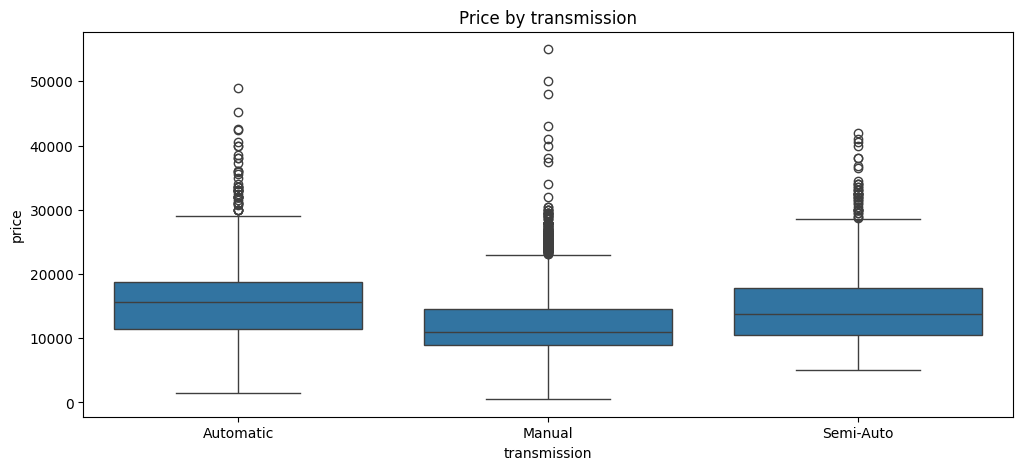

In [16]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="transmission", y="price")
plt.title("Price by transmission"); plt.show()

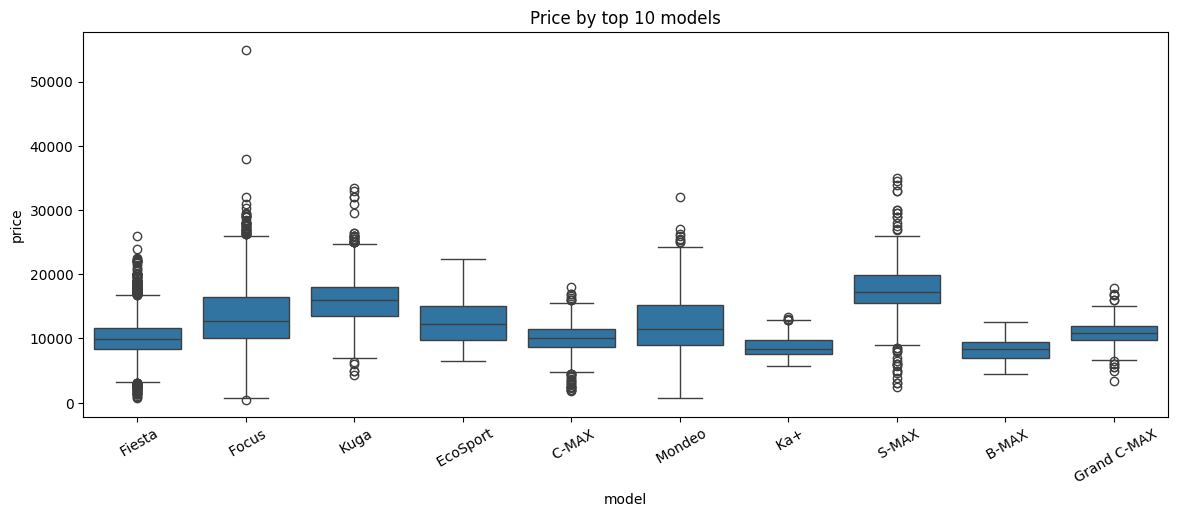

In [17]:
# Top 10 models only to avoid crowding
top_models = df["model"].value_counts().index[:10]
plt.figure(figsize=(14,5))
sns.boxplot(data=df[df["model"].isin(top_models)], x="model", y="price")
plt.title("Price by top 10 models"); plt.xticks(rotation=30); plt.show()

###  4) Correlation heatmap (numeric)

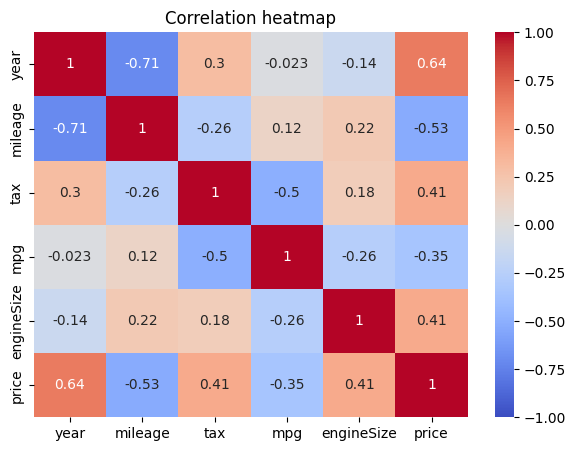

In [18]:
corr = df[num_cols].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation heatmap"); plt.show()

### Linear regression  (end-to-end)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [20]:
x= df.drop(columns=['price'],axis=1)
y=df['price']

In [21]:
#One hot incode
x_one_encode=pd.get_dummies(x,columns=['model','transmission','fuelType'],drop_first=True)

In [22]:
x_one_encode

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2018,9083,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,12456,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,10460,145,40.3,1.5,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,2019,1482,145,48.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47.1,1.4,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17962,2014,40700,30,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17963,2015,7010,20,67.3,1.6,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
17964,2018,5007,145,57.7,1.2,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [23]:
#convert True False in to integer
x_one_encode=x_one_encode.astype(int)

In [24]:
x_one_encode

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,40700,30,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [25]:
#aplying StandardScaler on num_features
num_features=['year','mileage','tax','mpg','engineSize']
scaler=StandardScaler()
x_one_encode[num_features]=scaler.fit_transform(x_one_encode[num_features])

In [26]:
x_one_encode

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.042122,-0.447984,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.552866,-0.733359,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.065128,-0.560132,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.040605,-0.662640,0.510727,-1.721198,-0.447984,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1.040605,-1.123724,0.510727,-0.931045,-0.447984,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.029814,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,-1.398088,0.890398,-1.343791,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,-0.910349,-0.839822,-1.505053,0.945569,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,0.552866,-0.942690,0.510727,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [27]:
from sklearn.model_selection import  train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_one_encode, y, test_size=0.20, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
#Gross valodation
from sklearn.model_selection import  cross_val_score

In [31]:
regression=LinearRegression()
regression.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [33]:
np.mean(mse)

np.float64(-3599831.1865552873)

In [34]:
##prediction
reg_pred=regression.predict(X_test)

In [35]:
reg_pred

array([ 6866.3580764 ,  9347.6810129 ,  9362.18320785, ...,
       31454.95287518,  9781.20362786, 15253.49970894], shape=(3594,))

In [36]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
7731     22000
11655    13699
10536    24979
11885    10500
4032     19718
Name: price, Length: 3594, dtype: int64

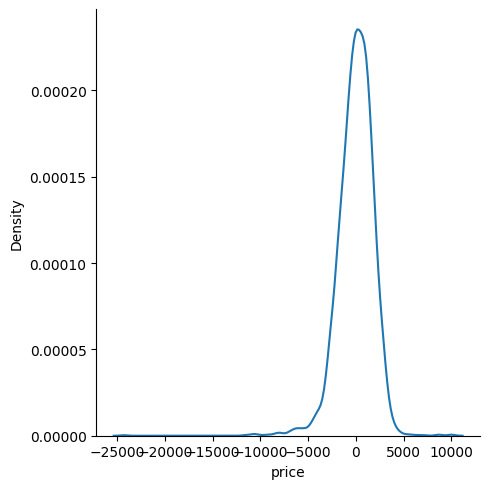

In [37]:
sns.displot(reg_pred-y_test,kind='kde')

In [38]:
from sklearn.metrics import r2_score

In [39]:
score=r2_score(reg_pred,y_test)

In [40]:
score

0.8240310848506167

In [41]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
7731     22000
11655    13699
10536    24979
11885    10500
4032     19718
Name: price, Length: 3594, dtype: int64

### Ridge Regression Algoritham

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import  GridSearchCV

In [43]:
ridge_regressor=Ridge()

In [44]:
parmeters={'alpha':[1,2,5,10,20,30,40,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parmeters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [45]:
print(ridgecv.best_params_)

{'alpha': 1}


In [46]:
print(ridgecv.best_score_)

-3612785.9543642486


In [47]:
ridge_pred=ridgecv.predict(X_test)

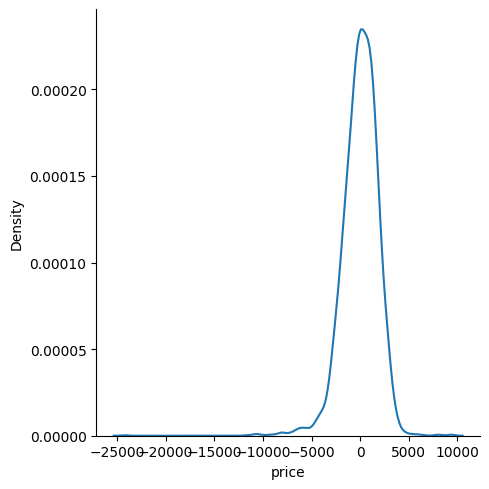

In [48]:
sns.displot(ridge_pred-y_test,kind='kde')

In [49]:
score=r2_score(ridge_pred,y_test)

In [50]:
score

0.8235812868548846

In [51]:
ridgecv.predict(X_test)

array([ 6862.52420709,  9351.46388732,  9347.51012071, ...,
       30823.66194197,  9785.83193479, 15252.7667368 ], shape=(3594,))

In [52]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
7731     22000
11655    13699
10536    24979
11885    10500
4032     19718
Name: price, Length: 3594, dtype: int64

### Lasso Regression

In [53]:
from sklearn.linear_model import Lasso

In [54]:
lasso=Lasso()

In [55]:
parmeters={'alpha':[1,2,5,10,20,30,40,60,70,80,90]}
lassocv=GridSearchCV(lasso,parmeters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

,estimator,Lasso()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [56]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-3628032.2455478264


In [57]:
lasso_pred=lassocv.predict(X_test)

In [58]:
lasso_pred

array([ 6835.93475813,  9354.00989472,  9348.62505423, ...,
       30559.11486301,  9787.3831984 , 15259.03545327], shape=(3594,))

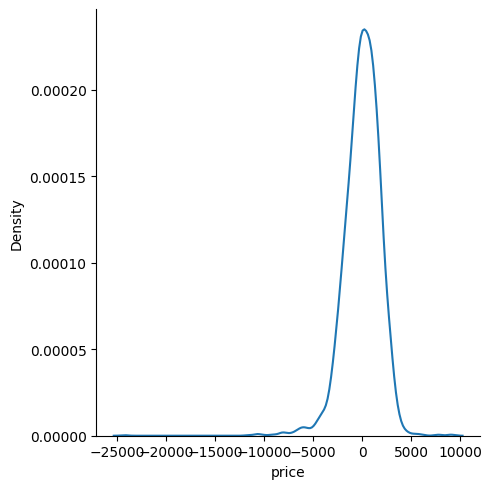

In [59]:
sns.displot(lasso_pred-y_test,kind='kde')
plt.show()

In [60]:
score=r2_score(ridge_pred,y_test)

In [61]:
score

0.8235812868548846

In [62]:
from sklearn.linear_model import ElasticNet

In [63]:
elasticnet=ElasticNet()

In [64]:
parmeters={'alpha':[1,2,5,10,20,30,40,60,70,80,90]}
elasticnetcv=GridSearchCV(elasticnet,parmeters,scoring='neg_mean_squared_error',cv=5)
elasticnetcv.fit(X_train,y_train)

,estimator,ElasticNet()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [65]:
elasticnet_pred=elasticnetcv.predict(X_test)

In [66]:
elasticnet_pred

array([ 7952.35571538, 10663.1298818 ,  8751.10128793, ...,
       19420.93165732, 10970.22075903, 14841.71297042], shape=(3594,))

In [67]:
y_test

17610     6995
7076      8999
1713      7998
1611      5491
16830     3790
         ...  
7731     22000
11655    13699
10536    24979
11885    10500
4032     19718
Name: price, Length: 3594, dtype: int64

In [68]:
score=r2_score(elasticnet_pred,y_test)

In [69]:
score

0.3230600016902291